#Machine Learning and FinTech 2024/25
##Homework 0923 reference answer
By TA, Chan Nok Hang

#Question 2
Suppose that we have four observations, for which we compute a
dissimilarity matrix.\
$\left[\begin{array}{ccc}
 & 0.3 & 0.4 & 0.7 \\
 0.3 &  & 0.5 & 0.8 \\
 0.4 & 0.5 &  & 0.45 \\
 0.7 & 0.8 & 0.45 &  \\
\end{array}\right]$

For instance, the dissimilarity between the frst and second obser-
vations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

##a)
On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
dissimilarity_matrix = np.array([[0, 0.3, 0.4, 0.7],
                                 [0.3, 0, 0.5, 0.8],
                                 [0.4, 0.5, 0, 0.45],
                                 [0.7, 0.8, 0.45, 0]])

<ipython-input-2-2b678473e677>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method='complete')


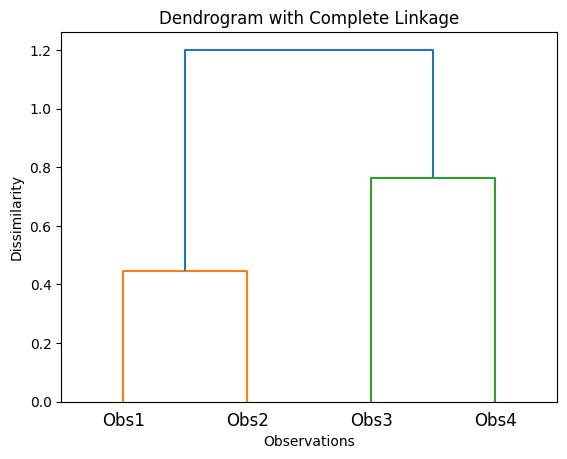

In [ ]:
linkage_matrix = linkage(dissimilarity_matrix, method='complete')

dendrogram(linkage_matrix, labels=["Obs1", "Obs2", "Obs3", "Obs4"])
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Dendrogram with Complete Linkage")
plt.show()

##b)
Repeat (a), this time using single linkage clustering.

In [ ]:
linkage_matrix = linkage(dissimilarity_matrix, method='single')

<ipython-input-3-63bb7defa464>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method='single')


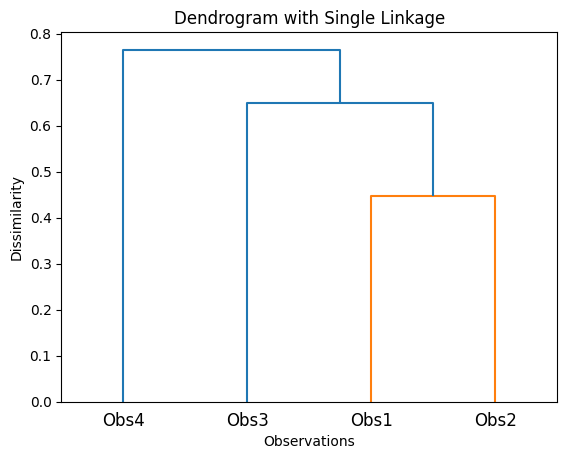

In [ ]:
dendrogram(linkage_matrix, labels=["Obs1", "Obs2", "Obs3", "Obs4"])
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Dendrogram with Single Linkage")
plt.show()

##c)
Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

Cluster1:(Observation 1, Observation 2)\
Cluster2:(Observation 3, Observation 4)


##d)
Suppose that we cut the dendrogram obtained in (b) such that
two clusters result. Which observations are in each cluster?

Cluster1:(Observation 4)\
Cluster2:(Observation 3, Observation 1, Observation 2)

##e)
It is mentioned in this chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

<ipython-input-7-cd82e31e9039>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method='complete')


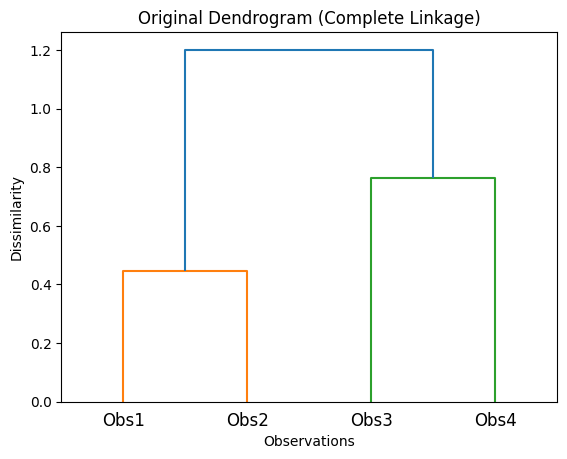

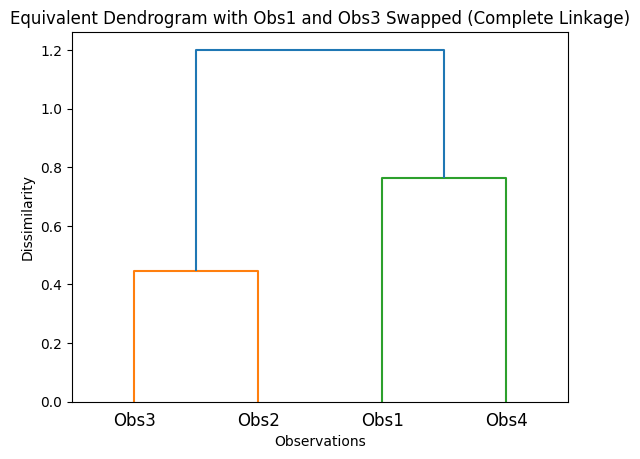

In [ ]:
# Perform hierarchical clustering with complete linkage
linkage_matrix = linkage(dissimilarity_matrix, method='complete')

# Plot the original dendrogram
dendrogram(linkage_matrix, labels=["Obs1", "Obs2", "Obs3", "Obs4"])
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Original Dendrogram (Complete Linkage)")
plt.show()

# Rearrange the positions of Obs1 and Obs3
# Create an equivalent dendrogram
rearranged_labels = ["Obs3", "Obs2", "Obs1", "Obs4"]

# Plot the equivalent dendrogram
plt.figure()
dendrogram(linkage_matrix, labels=rearranged_labels)
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.title("Equivalent Dendrogram with Obs1 and Obs3 Swapped (Complete Linkage)")
plt.show()


#Question 3
In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features. The observations are as follows.


| Obs. | X_1 | X_2  |
| :--: | :--:| :--: |
| 1 | 1 | 4 |
| 2 | 1 | 3 |
| 3 | 0 | 4 |
| 4 | 5 | 1 |
| 5 | 6 | 2 |
| 6 | 4 | 0 |

##a)
Plot the observations.

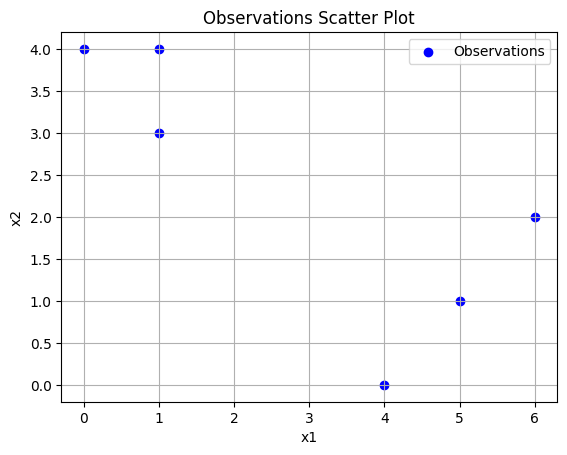

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array([1, 1, 0, 5, 6, 4])
x2 = np.array([4, 3, 4, 1, 2, 0])

# Create a scatter plot
plt.scatter(x1, x2, c='blue', marker='o', label='Observations')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Observations Scatter Plot')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

##b)
Randomly assign a cluster label to each observation. You can use
the np.random.choice() function to do this. Report the cluster
labels for each observation.

In [ ]:
# Number of clusters (K = 2)
K = 2

# Randomly assign cluster labels
cluster_labels = np.random.choice(K, len(x1))

# Report the cluster labels for each observation
for i in range(len(x1)):
    print(f'Observation {i+1} belongs to Cluster {cluster_labels[i]}')

Observation 1 belongs to Cluster 1
Observation 2 belongs to Cluster 1
Observation 3 belongs to Cluster 1
Observation 4 belongs to Cluster 0
Observation 5 belongs to Cluster 1
Observation 6 belongs to Cluster 0


##c)
Compute the centroid for each cluster.

In [ ]:
# Number of clusters
# K = 2

# Initialize arrays to store the centroids
centroids = np.zeros((K, 2))

# Compute centroids for each cluster
for k in range(K):
    # Select observations that belong to cluster k
    cluster_k_indices = np.where(cluster_labels == k)

    # Calculate the mean of the selected observations to get the centroid
    centroids[k] = np.mean(np.array([x1[cluster_k_indices], x2[cluster_k_indices]]), axis=1)

# Print the computed centroids for each cluster
for k in range(K):
    print(f'Centroid for Cluster {k}: ({centroids[k][0]}, {centroids[k][1]})')


Centroid for Cluster 0: (4.5, 0.5)
Centroid for Cluster 1: (2.0, 3.25)


##d)
Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.

In [ ]:
# Initialize an array to store the updated cluster labels
updated_cluster_labels = np.zeros(len(x1), dtype=int)

# Assign each observation to the nearest centroid
for i in range(len(x1)):
    distances = np.sqrt((x1[i] - centroids[:, 0]) ** 2 + (x2[i] - centroids[:, 1]) ** 2)
    updated_cluster_labels[i] = np.argmin(distances)

# Report the updated cluster labels for each observation
for i in range(len(x1)):
    print(f'Observation {i+1} now belongs to Cluster {updated_cluster_labels[i]}')


Observation 1 now belongs to Cluster 1
Observation 2 now belongs to Cluster 1
Observation 3 now belongs to Cluster 1
Observation 4 now belongs to Cluster 0
Observation 5 now belongs to Cluster 0
Observation 6 now belongs to Cluster 0


##e)
Repeat (c) and (d) until the answers obtained stop changing.

In [ ]:
# Initialize a variable to keep track of iterations
iteration = 0

# Maximum number of iterations (to avoid infinite loops)
max_iterations = 100

# Repeat steps (c) and (d) until convergence
converged = False
while not converged and iteration < max_iterations:
    # Print cluster labels for the current iteration
    print(f'Iteration {iteration}: Cluster Labels - {cluster_labels}')

    # (c) Compute centroids for each cluster
    for k in range(K):
        # Select observations that belong to cluster k
        cluster_k_indices = np.where(cluster_labels == k)

        # Calculate the mean of the selected observations to get the centroid
        centroids[k] = np.mean(np.array([x1[cluster_k_indices], x2[cluster_k_indices]]), axis=1)

    # (d) Assign each observation to the nearest centroid
    updated_cluster_labels = np.argmin(
        np.sqrt((x1[:, np.newaxis] - centroids[:, 0])**2 + (x2[:, np.newaxis] - centroids[:, 1])**2),
        axis=1
    )

    # Check for convergence by comparing new cluster labels with the previous ones
    if np.array_equal(updated_cluster_labels, cluster_labels):
        converged = True
    else:
        cluster_labels = updated_cluster_labels

    # Increment the iteration counter
    iteration += 1

# Print the final cluster assignments
print(f'Final Cluster Labels - {cluster_labels}')


Iteration 0: Cluster Labels - [1 1 1 0 1 0]
Iteration 1: Cluster Labels - [1 1 1 0 0 0]
Final Cluster Labels - [1 1 1 0 0 0]


##f)
In your plot from (a), color the observations according to the
cluster labels obtained.

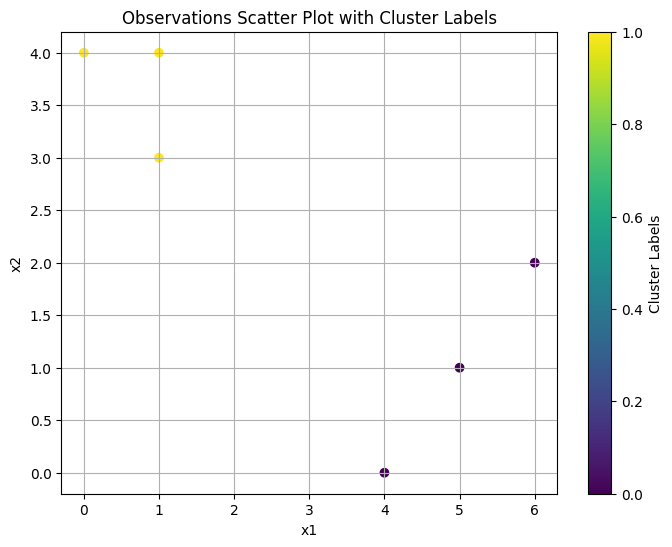

In [ ]:
# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=cluster_labels, cmap='viridis', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Observations Scatter Plot with Cluster Labels')
plt.colorbar(label='Cluster Labels')

# Show the plot
plt.grid(True)
plt.show()